### To Train Object Detector


In [4]:
#Clone the darknet repository
!git clone https://github.com/AlexeyAB/darknet.git

^C


In [ ]:
cd darknet
#Open the makefile and enable the GPU and OpenCV
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
#This accelerates training and increases the speed of detection

In [ ]:
#This will build the Makefile which will enable the darknet executable to be further used for training,testing an detecting
!make

In [ ]:
!chmod +x ./darknet

In [ ]:
# To train on Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:

# cd back into the darknet folder to run detections
%cd darknet

In [ ]:
#Using Transfer Learning by using pre-trained weights on COCO dataset.
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### To Train Object Detector

1.Labeled Custom Dataset

2.Custom .cfg file

3.obj.data and obj.names files

4.train.txt file (test.txt is optional here as well)



In [ ]:
# download cfg to google drive and change its name
!cp cfg/yolov4-custom.cfg /mydrive/ObjectDetectionYOLOV4/yolov4-obj.cfg

In [ ]:
# to download to local machine (change its name to yolov4-obj.cfg once you download)
download('cfg/yolov4-custom.cfg')

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

 batch = 64 and subdivisions = 64  If you run into GPU memory issues. Otherwise to 16 or 32

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

Note: I set my max_batches = 6000 and policy=sgdr with sgdr_cycle=1000 and sgdr_mult=2 I changed the classes = 1 in the three YOLO layers and filters = 18 in the three convolutional layers before the YOLO layers.

How to Configure Your Variables:

width = 512

height = 512 (these can be any multiple of 32, 416 is standard, you can sometimes improve results by making value larger like 608 but will slow down training)

max_batches = (# of classes) * 2000 (but no less than 6000 so if you are training for 1, 2, or 3 classes it will be 6000)

policy=steps - policy for changing learning rate: constant (by default), sgdr, steps, step, sig, exp, poly, random (f.e., if policy=random - then current learning rate will be changed in this way = learning_rate * pow(rand_uniform(0,1), power)

filters = (# of classes + 5) * 3 (so if you are training for one class then your filters = 18, but if you are training for 2 classes then your filters = 21)

sgdr_cycle=1000 - if policy=sgdr - the initial number of iterations in cosine-cycle

sgdr_mult=2 - if policy=sgdr


Upload the images with the corresponding annotation files into darknet directory into obj inside data. Both Training and Testing data along with the txt files generated by using the python scripts generate_train_txt.py and generate_validation_txt.py

create a obj.data file and fill it in like this (change your number of classes accordingly, as well as your backup location)
obj.names and obj.data

Create a new file within a code or text editor called obj.names where you will have one class name per line from the dataset generation step. Here obj.names is edited in notepad. Cruise is the class to be detected
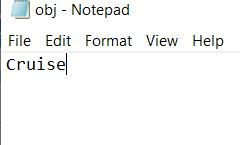


You will also create a obj.data file and fill it in like this (change your number of classes accordingly, as well as your backup location)

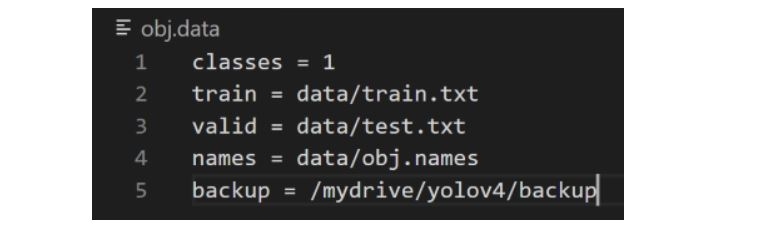

train is the location where the train.txt file is saved by using the python script. It will link to the text file with the training images

valid is the location where the test.txt/validation.txt file is saved using the python script. It will link to the text file with the validation images

backup saves the location of the weights during training

Training


In [ ]:
#To start training custom yolo model
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

In [ ]:
#Google Colab has the tendency to disconnect after 6 hours of training. Hence to start training from previous weight
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/ObjectDetectionYOLOV4/backup/yolov4-obj_last.weights -dont_show

 Checking the Mean Average Precision (mAP) of Your Model

In [ ]:
#Once the training is completed, in obj.data the test data can be input into the valid field.
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/ObjectDetectionYOLOV4/backup/yolov4-obj_best.weights

Running Detection on test images

In [ ]:

# need to set the custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov4-obj.cfg
!sed -i 's/subdivisions=64/subdivisions=1/' yolov4-obj.cfg
%cd ..

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/ObjDetYOLOv4MoreClasses/backup/yolov4-obj_best.weights /mydrive/ObjectDetectionYOLOV4/test3.jpg -thresh 0.5

In [ ]:
#run your custom detector on video

!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg /mydrive/ObjDetYOLOv4MoreClasses/backup/yolov4-obj_best.weights -dont_show /mydrive/ObjectDetectionYOLOV4/Neulander_Test.mov -i 0 -out_filename  /mydrive/ObjectDetectionYOLOV4/results.avi